# Fig: MI

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from base.dataset import ROFLDS
from analysis.linear import compute_dci, mi_analysis

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

skip_fits = [
    'fixate2_nf-420_beta-0.15_(2023_04_27,13:57).npy',
    'fixate1_nf-420_beta-0.8_(2023_05_07,04:15).npy',
]
pal_model, pal_cat = get_palette()

In [3]:
# load dataset
category = 'fixate1'
g, g_tst, select_i, select_lbl = prep_rofl(category)

In [4]:
path = pjoin(tmp_dir, 'trainer_analysis')

In [5]:
fits = [
    'fixate1_nf-420_beta-0.15_(2023_04_27,20:20).npy',
    'vanilla_fixate1_nf-420_beta-1.5_(2023_05_14,14:16).npy',
]
everything = {}
for fit in fits:
    everything[fit] = np.load(
        pjoin(path, fit),
        allow_pickle=True,
    ).item()

In [6]:
from figures.dci import plot_scatter

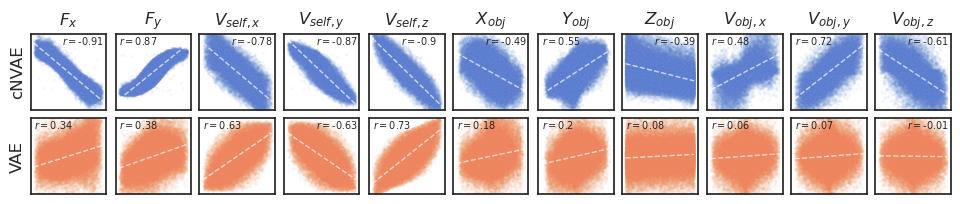

In [10]:
fig, _ = plot_scatter(everything)

In [11]:
fig.savefig(pjoin(fig_base_dir, 'untang_300.png'), **kws_fig)

kws_fig['dpi'] = 600
fig.savefig(pjoin(fig_base_dir, 'untang_600.png'), **kws_fig)

## Now mi

In [12]:
%%time

mi = {}
for fit, v in everything.items():
    mi[fit] = mi_analysis(v['data_vld']['z'], g)
data = {
    extract_info(k)[-1]: v['mi']
    for k, v in mi.items()
}

CPU times: user 35.7 s, sys: 31.5 s, total: 1min 7s
Wall time: 5min 53s


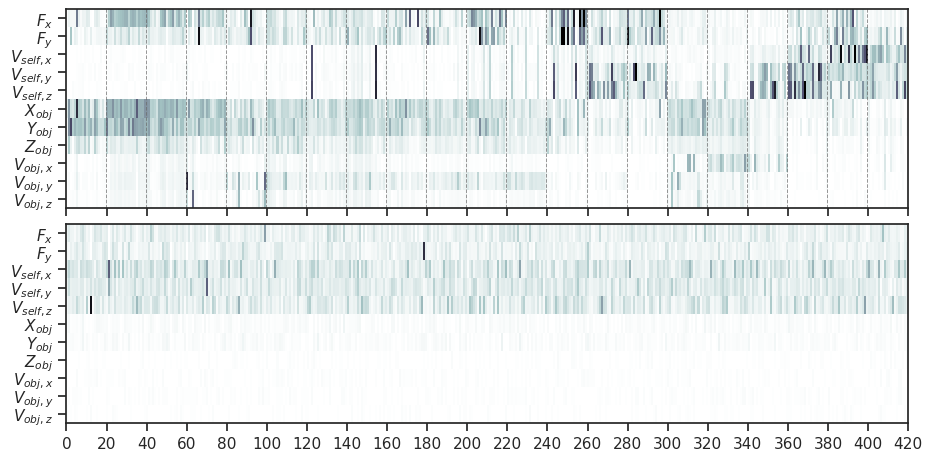

In [23]:
fig, _ = plot_hm(data)

In [24]:
fig.savefig(pjoin(fig_base_dir, 'mi.pdf'), **kws_fig)
fig.savefig(pjoin(fig_base_dir, 'mi.png'), **kws_fig)

## Load for quickness

In [7]:
jake = np.load(pjoin(tmp_dir, 'jake_mi.npy'), allow_pickle=True).item()

In [8]:
mi_cnvae = jake['fixate1_nf-420_beta-0.15_(2023_04_27,20:20).npy']
mi_vae = jake['vanilla_fixate1_nf-420_beta-1.5_(2023_05_14,14:16).npy']

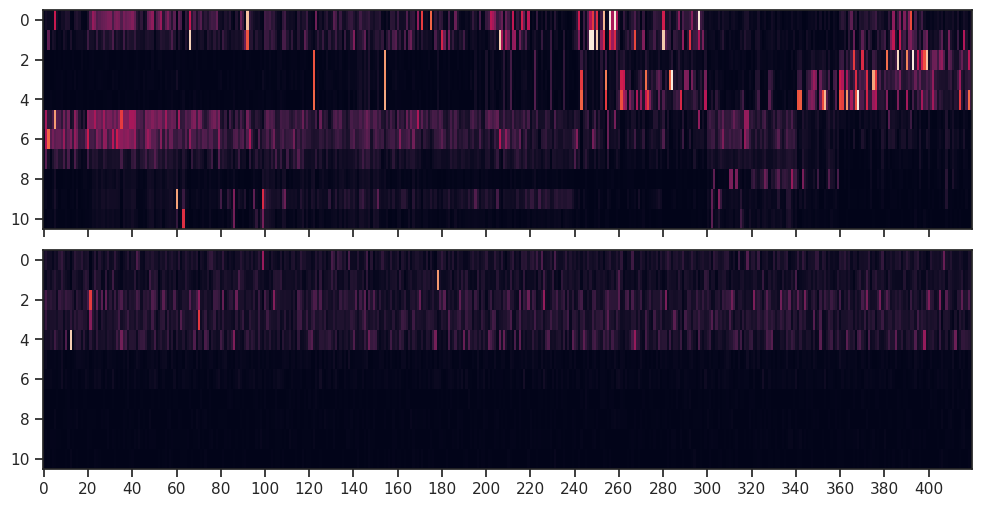

In [9]:
fig, axes = create_figure(2, 1, (9.7, 5), 'all', 'all', layout='constrained')
axes[0].imshow(mi_cnvae, aspect=9, vmin=0, vmax=0.5, cmap='rocket')
axes[1].imshow(mi_vae, aspect=9, vmin=0, vmax=0.5, cmap='rocket')

axes[1].locator_params(axis='x', nbins=40)

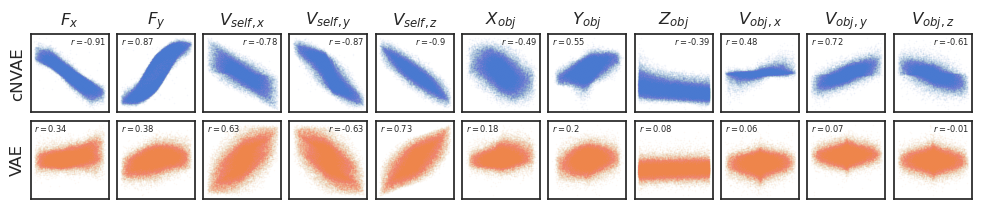

In [156]:
props = dict(boxstyle='round', facecolor='none', edgecolor='none', alpha=0.5)

fig, axes = create_figure(2, 11, (9.7, 1.95), sharex='col', layout='constrained')
for i, (fit, r) in enumerate(corrs.items()):
    category, nf, beta, tag = _info(fit)
    inds = np.argmax(np.abs(r), axis=1)
    for j in range(11):
        _x = g[:, j]
        _y = everything[fit]['data_vld']['z'][:, inds[j]]
        _y = sp_stats.zscore(_y)
        sns.scatterplot(
            x=_x,
            y=_y,
            color=pal_model[tag],
            s=1,
            alpha=0.05,
            ax=axes[i, j],
        )
        axes[i, j].text(
            x=0.05 if r[j, inds[j]] > 0 else 0.5,
            y=0.98,
            s=r'$r = $' + str(np.round(r[j, inds[j]], 2)),
            transform=axes[i, j].transAxes,
            verticalalignment='top',
            fontsize=6,
            bbox=props,
        )
        if j == 0:
            axes[i, j].set_ylabel(tag)
        if i == 0:
            axes[i, j].set_title(
                label2latex[select_lbl[j]],
                y=1.02,
            )
remove_ticks(axes, full=False)
ax_square(axes)
plt.show()

In [157]:
_y.shape

(75000,)

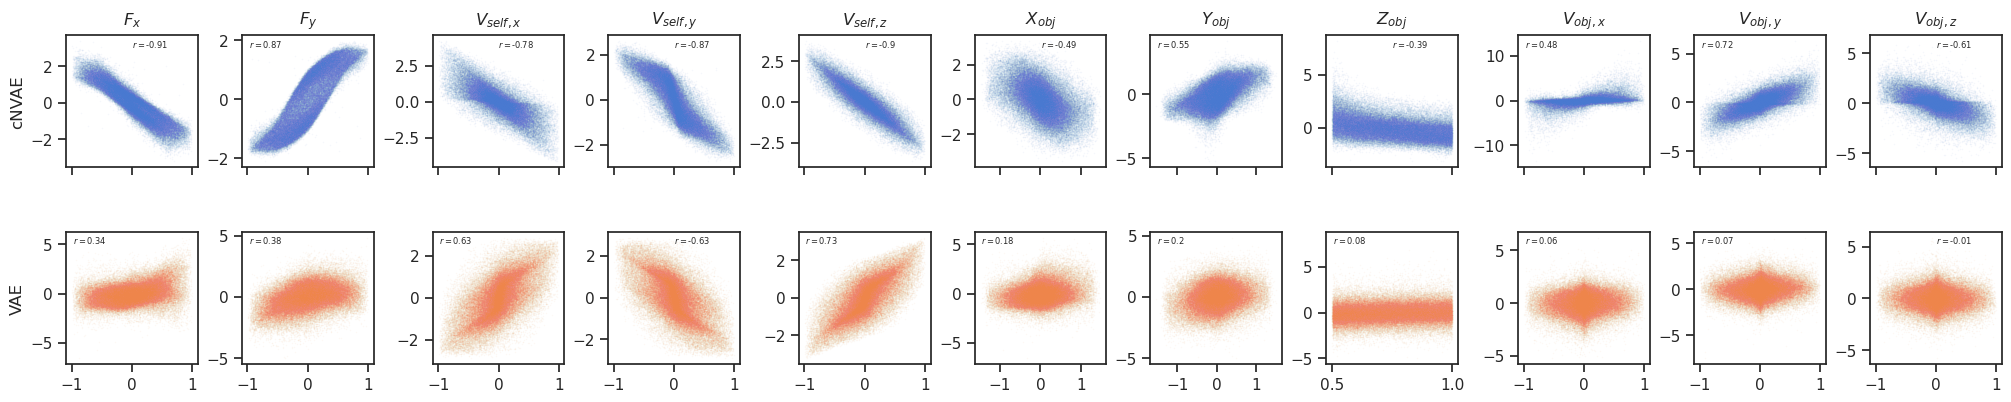

In [158]:
props = dict(boxstyle='round', facecolor='none', edgecolor='none', alpha=0.5)

fig, axes = create_figure(2, 11, (20, 4), sharex='col', layout='constrained')
for i, (fit, r) in enumerate(corrs.items()):
    category, nf, beta, tag = _info(fit)
    inds = np.argmax(np.abs(r), axis=1)
    for j in range(11):
        _x = g[:, j]
        _y = everything[fit]['data_vld']['z'][:, inds[j]]
        _y = sp_stats.zscore(_y)
        sns.scatterplot(
            x=_x,
            y=_y,
            color=pal_model[tag],
            s=1,
            alpha=0.05,
            ax=axes[i, j],
        )
        axes[i, j].text(
            x=0.05 if r[j, inds[j]] > 0 else 0.5,
            y=0.98,
            s=r'$r = $' + str(np.round(r[j, inds[j]], 2)),
            transform=axes[i, j].transAxes,
            verticalalignment='top',
            fontsize=6,
            bbox=props,
        )
        if j == 0:
            axes[i, j].set_ylabel(tag)
        if i == 0:
            axes[i, j].set_title(
                label2latex[select_lbl[j]],
                y=1.02,
            )
ax_square(axes)
plt.show()

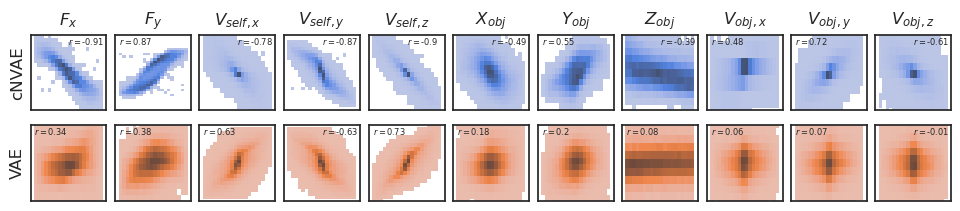

In [169]:
fig, axes = create_figure(2, 11, (9.5, 2), sharex='col', sharey='row', layout='constrained')
for i, (fit, r) in enumerate(corrs.items()):
    category, nf, beta, tag = _info(fit)
    inds = np.argmax(np.abs(r), axis=1)
    for j in range(11):
        _x = g[:, j]
        _y = everything[fit]['data_vld']['z'][:, inds[j]]
        _y = sp_stats.zscore(_y)
        sns.histplot(
            x=_x,
            y=_y,
            bins=20,
            color=pal_model[tag],
            ax=axes[i, j],
        )
        axes[i, j].annotate(
            text=r'$r = $' + str(np.round(r[j, inds[j]], 2)),
            xy=(0.05 if r[j, inds[j]] > 0 else 0.5, 0.87),
            xycoords='axes fraction',
            fontsize=6,
        )
        if j == 0:
            axes[i, j].set_ylabel(tag)
        if i == 0:
            axes[i, j].set_title(
                label2latex[select_lbl[j]],
                y=1.02,
            )
axes[0, 0].set_ylim(-3, 3)
axes[1, 0].set_ylim(-3, 3)
remove_ticks(axes, False)
ax_square(axes)
plt.show()

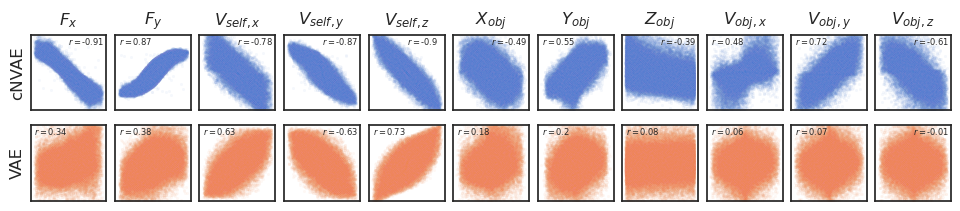

In [170]:
fig, axes = create_figure(2, 11, (9.5, 2), sharex='col', sharey='row', layout='constrained')
for i, (fit, r) in enumerate(corrs.items()):
    category, nf, beta, tag = _info(fit)
    inds = np.argmax(np.abs(r), axis=1)
    for j in range(11):
        _x = g[:, j]
        _y = everything[fit]['data_vld']['z'][:, inds[j]]
        _y = sp_stats.zscore(_y)
        sns.scatterplot(
            x=_x,
            y=_y,
            s=5,
            alpha=0.05,
            # bins=20,
            color=pal_model[tag],
            ax=axes[i, j],
        )
        axes[i, j].annotate(
            text=r'$r = $' + str(np.round(r[j, inds[j]], 2)),
            xy=(0.05 if r[j, inds[j]] > 0 else 0.5, 0.87),
            xycoords='axes fraction',
            fontsize=6,
        )
        if j == 0:
            axes[i, j].set_ylabel(tag)
        if i == 0:
            axes[i, j].set_title(
                label2latex[select_lbl[j]],
                y=1.02,
            )
axes[0, 0].set_ylim(-3, 3)
axes[1, 0].set_ylim(-3, 3)
remove_ticks(axes, False)
ax_square(axes)
plt.show()

In [190]:
list(mi)

['fixate1_nf-420_beta-0.15_(2023_04_27,20:20).npy',
 'vanilla_fixate1_nf-420_beta-1.5_(2023_05_14,14:16).npy']

In [192]:
v = mi['fixate1_nf-420_beta-0.15_(2023_04_27,20:20).npy']

In [193]:
v

{'mi': array([[6.93054166e-03, 2.56845659e-02, 1.71403040e-02, ...,
         1.81879572e-02, 4.77212287e-03, 2.24173316e-02],
        [7.38940497e-03, 3.54146761e-03, 1.23351900e-01, ...,
         4.06223600e-02, 3.84289488e-03, 4.56894111e-02],
        [2.67499537e-03, 1.71302130e-03, 0.00000000e+00, ...,
         6.25285279e-02, 2.28259366e-01, 6.90657896e-02],
        ...,
        [2.45522146e-03, 4.18361994e-03, 3.35409463e-03, ...,
         6.69445174e-03, 4.03010842e-03, 1.51740703e-04],
        [3.39297760e-03, 1.04007310e-02, 0.00000000e+00, ...,
         9.59846823e-03, 0.00000000e+00, 5.45959324e-03],
        [0.00000000e+00, 0.00000000e+00, 4.45528914e-03, ...,
         0.00000000e+00, 0.00000000e+00, 2.74509636e-03]]),
 'mi_norm': array([[0.00302545, 0.00859701, 0.00347504, ..., 0.00645162, 0.00120844,
         0.00690005],
        [0.00219177, 0.00180246, 0.0303506 , ..., 0.012732  , 0.00231513,
         0.01615009],
        [0.00059609, 0.00161746, 0.00098516, ..., 0.0207

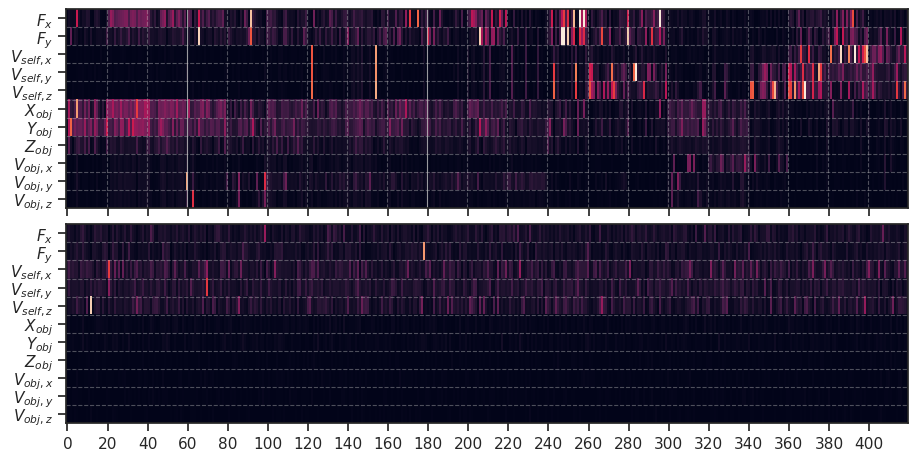

In [88]:
fig, axes = create_figure(2, 1, (10, 4.5), 'all', 'all', layout='constrained')

for i, (fit, v) in enumerate(mi.items()):
    axes[i].imshow(v['mi'], aspect=9, vmin=0, vmax=0.5)
axes[1].locator_params(axis='x', nbins=40)

axes[0].set(yticks=range(len(label2latex)), yticklabels=list(label2latex.values()))
axes[1].set(yticks=range(len(label2latex)), yticklabels=list(label2latex.values()))

for i in range(1, 21):
    val = i * 20 - 0.5
    if i in [3, 9]:
        ls = '-'
        alpha = 0.8
    else:
        ls = '--'
        alpha = 0.4
    axes[0].axvline(val, color='silver', ls=ls, lw=0.8, alpha=alpha)
for i in range(11):
    for ax in axes.flat:
        ax.axhline(i + 0.5, color='silver', ls='--', lw=0.8, alpha=0.4)
plt.show()

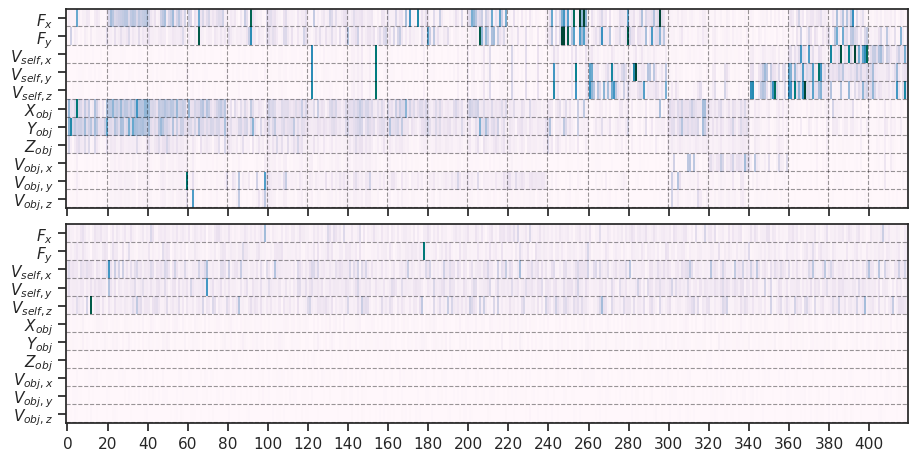

In [117]:
fig, axes = create_figure(2, 1, (10, 4.5), 'all', 'all', layout='constrained')

for i, (fit, v) in enumerate(mi.items()):
    axes[i].imshow(v['mi'], aspect=9, vmin=0, vmax=0.5, cmap='PuBuGn')
axes[1].locator_params(axis='x', nbins=40)

axes[0].set(yticks=range(len(label2latex)), yticklabels=list(label2latex.values()))
axes[1].set(yticks=range(len(label2latex)), yticklabels=list(label2latex.values()))

for i in range(1, 21):
    val = i * 20 - 0.5
    if i in [3, 9]:
        ls = '--'
        alpha = 0.4
    else:
        ls = '--'
        alpha = 0.4
    axes[0].axvline(val, color='k', ls=ls, lw=0.8, alpha=alpha)

for ax in axes.flat:
    for i in range(11):
        ax.axhline(i + 0.45, color='k', ls='--', lw=0.8, alpha=0.4)
plt.show()

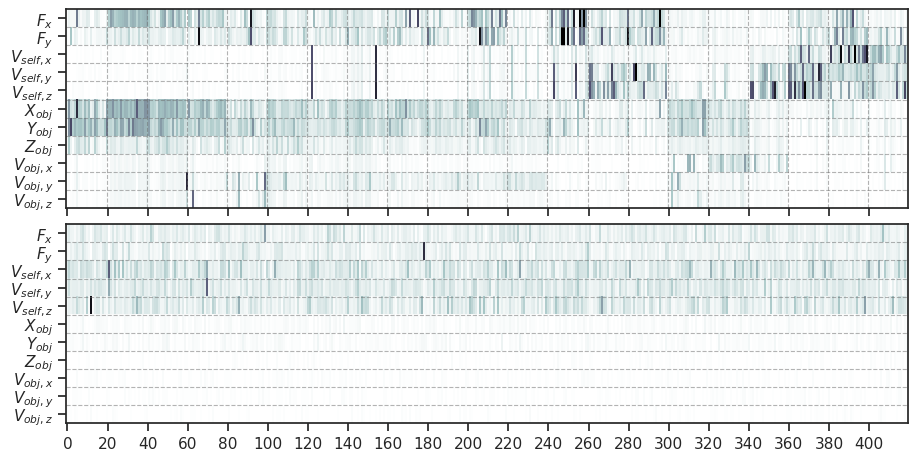

In [17]:
fig, axes = create_figure(2, 1, (10, 4.5), 'all', 'all', layout='constrained')

for i, (fit, v) in enumerate(jake.items()):
    axes[i].imshow(v, aspect=9, vmin=0, vmax=0.5, cmap='bone_r')
axes[1].locator_params(axis='x', nbins=40)

axes[0].set(yticks=range(len(label2latex)), yticklabels=list(label2latex.values()))
axes[1].set(yticks=range(len(label2latex)), yticklabels=list(label2latex.values()))

for i in range(1, 21):
    val = i * 20 - 0.5
    if i in [3, 9]:
        ls = '--'
        alpha = 0.5
    else:
        ls = '--'
        alpha = 0.5
    axes[0].axvline(val, color='dimgrey', ls=ls, lw=0.8, alpha=alpha)

for ax in axes.flat:
    for i in range(0, 11):
        ax.axhline(i + 0.5, color='dimgrey', ls='--', lw=0.8, alpha=0.5)
plt.show()

In [20]:
fig.savefig(pjoin(fig_base_dir, 'mi.pdf'), **kws_fig)
fig.savefig(pjoin(fig_base_dir, 'mi.png'), **kws_fig)

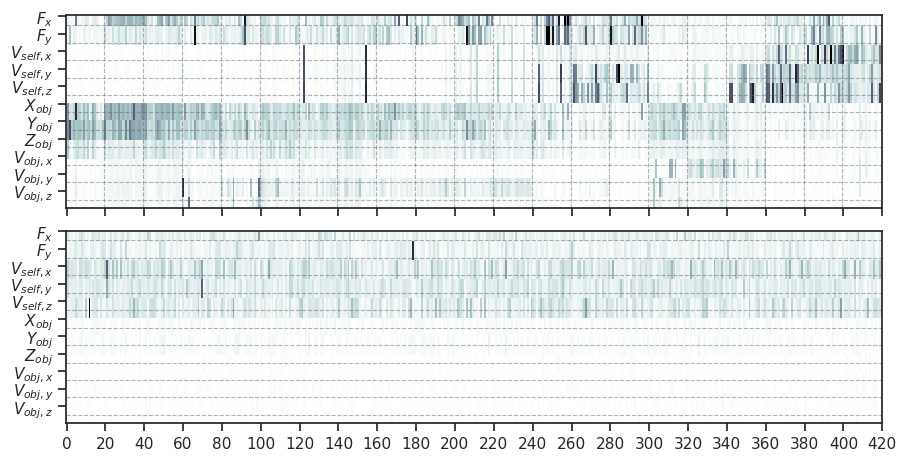

In [27]:
fig, axes = create_figure(2, 1, (10, 4.5), 'all', 'all', layout='constrained')

for i, (fit, v) in enumerate(jake.items()):
    x2p = sp_img.zoom(v, 10, order=0, mode='nearest')
    axes[i].imshow(x2p, aspect=9, vmin=0, vmax=0.5, cmap='bone_r')
axes[0].set(
    yticks=np.arange(0, len(label2latex) * 10, 10),
    yticklabels=list(label2latex.values()),
)
axes[1].set(
    yticks=np.arange(0, len(label2latex) * 10, 10),
    yticklabels=list(label2latex.values()),
    xticks=np.arange(0, 420 * 10 + 1, 20 * 10),
    xticklabels=np.arange(0, 420 + 1, 20),
)

for i in range(1, 21):
    val = i * 20 - 0.5
    if i in [3, 9]:
        ls = '--'
        alpha = 0.5
    else:
        ls = '--'
        alpha = 0.5
    axes[0].axvline(val * 10, color='dimgrey', ls=ls, lw=0.8, alpha=alpha)

for ax in axes.flat:
    for i in range(11):
        ax.axhline((i + 0.5) * 10, color='dimgrey', ls='--', lw=0.8, alpha=0.5)
plt.show()

In [28]:
fig.savefig(pjoin(fig_base_dir, 'mi_10.pdf'), **kws_fig)

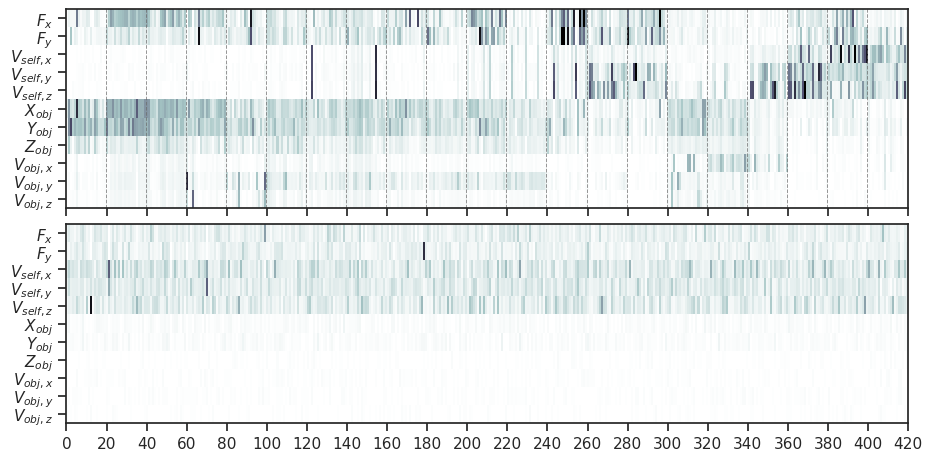

In [55]:
fig, axes = create_figure(2, 1, (10, 4.5), 'all', 'all', layout='constrained')

factor = 25

for i, (fit, v) in enumerate(jake.items()):
    x2p = np.repeat(np.repeat(
        v, factor, axis=0), factor, axis=1)
    axes[i].imshow(x2p, aspect=9, vmin=0, vmax=0.5, cmap='bone_r')
axes[0].set(
    yticks=np.arange(0, len(label2latex) * factor, factor) + factor // 2,
    yticklabels=list(label2latex.values()),
)
axes[1].set(
    yticks=np.arange(0, len(label2latex) * factor, factor) + factor // 2,
    yticklabels=list(label2latex.values()),
    xticks=np.arange(0, 420 * factor + 1, 20 * factor),
    xticklabels=np.arange(0, 420 + 1, 20),
)

for i in range(1, 21):
    val = i * 20 - 0.5
    if i in [3, 9]:
        ls = '--'
        alpha = 0.7
    else:
        ls = '--'
        alpha = 0.7
    axes[0].axvline(val * factor, color='dimgrey', ls=ls, lw=0.7, alpha=alpha)

plt.show()

In [56]:
fig.savefig(pjoin(fig_base_dir, 'mi.pdf'), **kws_fig)
fig.savefig(pjoin(fig_base_dir, 'mi.png'), **kws_fig)

In [242]:
v = mi['fixate1_nf-420_beta-0.15_(2023_04_27,20:20).npy']
xx = v['mi'].reshape(-1, 21, 20)
xx.shape

(11, 21, 20)

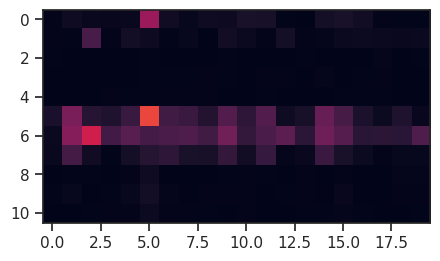

In [244]:
plt.imshow(xx[:, 0, :], vmin=0, vmax=0.65)

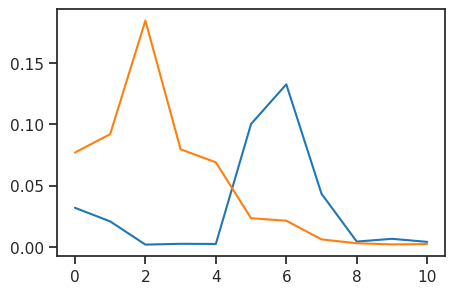

In [255]:
plt.plot(xx[:, 0, :].mean(1))
plt.plot(xx[:, 19, :].mean(1))

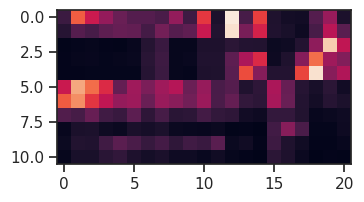

In [261]:
fig, ax = create_figure(1, 1, (10, 2))
ax.imshow(xx.mean(-1))

In [262]:
yy = xx.mean(-1)
yy.shape

(11, 21)

In [292]:
q = 0.9
thres = np.quantile(v['mi'], q)

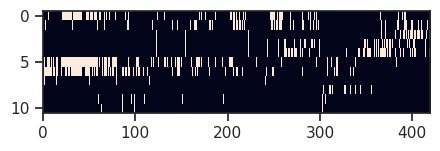

In [297]:
active = v['mi'] > thres
plt.imshow(active, aspect=10);

In [298]:
x_filt = v['mi'].copy()
x_filt[~active] = np.nan

In [305]:
xx_filt = x_filt.reshape(-1, 21, 20)
yy_filt = np.nanmean(xx_filt, -1)

/tmp/ipykernel_909219/3909724208.py:2: RuntimeWarning: Mean of empty slice
  yy_filt = np.nanmean(xx_filt, -1)


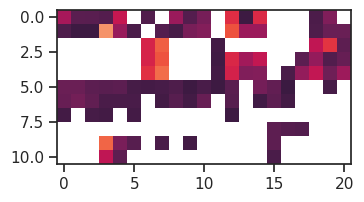

In [307]:
fig, ax = create_figure(1, 1, (10, 2))
ax.imshow(yy_filt, vmin=0, vmax=0.6)

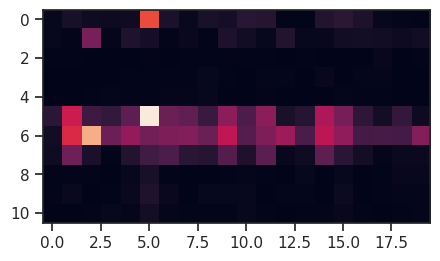

In [310]:
plt.imshow(v['mi'][:, :20], vmin=0)

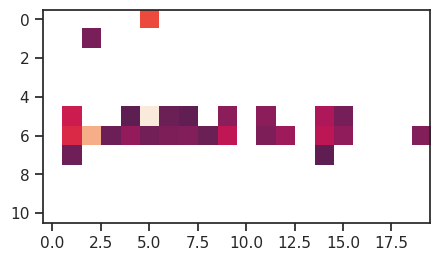

In [311]:
plt.imshow(xx_filt[:, 0, :], vmin=0)

## Scatter

In [36]:
q_vals = [0.5, 0.8, 0.9, 0.95, 1.0]
thresh = np.quantile(data['cNVAE'], q_vals)
df_mi = []
for i, lbl in enumerate(select_lbl):
    for j in range(420):
        val = data['cNVAE'][i, j]
        layer = j // 20
        if layer in range(3):
            scale = 2
        elif layer in range(3, 3 + 6):
            scale = 4
        else:
            scale = 8
        df_mi.append({
            'f': [lbl] * len(q_vals),
            'Mutual info.': [val] * len(q_vals),
            'layer': [layer] * len(q_vals),
            'scale': [scale] * len(q_vals),
            'above': [val >= e for e in thresh],
            'thresh': thresh,
            'q': q_vals,
        })
df_mi = pd.DataFrame(merge_dicts(df_mi))    

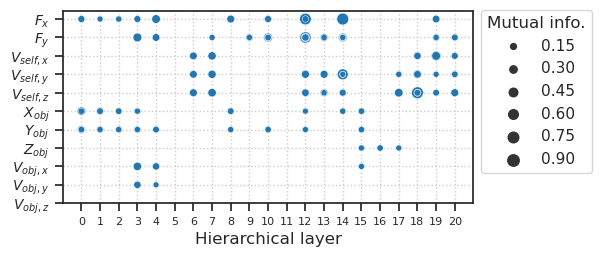

In [37]:
_df = df_mi.loc[
    (df_mi['q'] == 0.95) &
    (df_mi['above'] == True)
]
fig, ax = create_figure(1, 1, (5.3, 2.5))
sns.scatterplot(data=_df, x='layer', y='f', size='Mutual info.', s=320, ax=ax)
ax.set(
    yticks=range(len(LBL2TEX)),
    yticklabels=list(LBL2TEX.values()),
    xticks=range(21),
)
sns.move_legend(ax, None, bbox_to_anchor=(1, 1.045))
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Hierarchical layer', fontsize=12)
ax.set_ylabel('')
ax.grid()
plt.show()

In [38]:
fig.savefig(pjoin(fig_base_dir, 'mi_scatter.pdf'), **kws_fig)
fig.savefig(pjoin(fig_base_dir, 'mi_scatter.png'), **kws_fig)

## This should work (but above was better)

In [31]:
xx = data['cNVAE'].reshape(-1, 21, 20)
xx.shape

(11, 21, 20)

In [32]:
q_vals = [0.5, 0.8, 0.9, 0.95, 1.0]
df_mi = []
for i, lbl in enumerate(select_lbl):
    for j in range(420):
        val = data['cNVAE'][i, j]
        layer = j // 20
        thresh = np.quantile(xx[:, layer, :], q_vals)
        if layer in range(3):
            scale = 2
        elif layer in range(3, 3 + 6):
            scale = 4
        else:
            scale = 8
        df_mi.append({
            'f': [lbl] * len(q_vals),
            'Mutual info.': [val] * len(q_vals),
            'layer': [layer] * len(q_vals),
            'scale': [scale] * len(q_vals),
            'above': [val >= e for e in thresh],
            'thresh': thresh,
            'q': q_vals,
        })
df_mi = pd.DataFrame(merge_dicts(df_mi))    

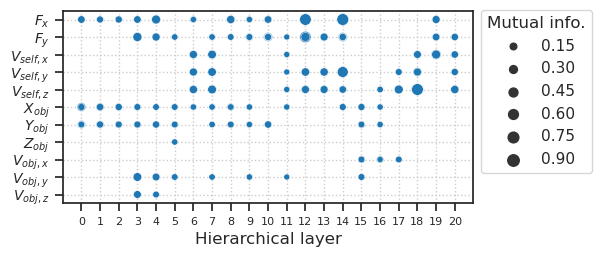

In [34]:
_df = df_mi.loc[
    (df_mi['q'] == 0.95) &
    (df_mi['above'] == True)
]

fig, ax = create_figure(1, 1, (5.3, 2.5))
sns.scatterplot(data=_df, x='layer', y='f', size='Mutual info.', s=320, ax=ax)
ax.set(
    yticks=range(len(LBL2TEX)),
    yticklabels=list(LBL2TEX.values()),
    xticks=range(21),
)
sns.move_legend(ax, None, bbox_to_anchor=(1, 1.045))
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Hierarchical layer', fontsize=12)
ax.set_ylabel('')
ax.grid()
plt.show()